# **Evaluation**

## **Loading All Data**

### **Loading Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

### **Loading the Test Data and Model**

In [3]:
X_test = pd.read_csv('/workspaces/Global-Population-Growth-EDA-and-Prediction/data/test/X_test.csv')  
y_test = pd.read_csv('/workspaces/Global-Population-Growth-EDA-and-Prediction/data/test/y_test.csv')  
model = joblib.load('/workspaces/Global-Population-Growth-EDA-and-Prediction/models/population_growth_model.pkl')

## **Model Prediction**

### **Making Predictions**

In [4]:
y_pred = model.predict(X_test)

## **Model Evaluation**

### **Calculate Evaluation Metrics**

In [5]:
print("Model Performance on Test Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Model Performance on Test Data:
MAE: 0.0010678067327660567
MSE: 1.4632377497146501e-05
R2 Score: 0.9986250042509114


## **Visualizing Predictions**

### **Scatter Plot of Actual vs. Predicted Values**

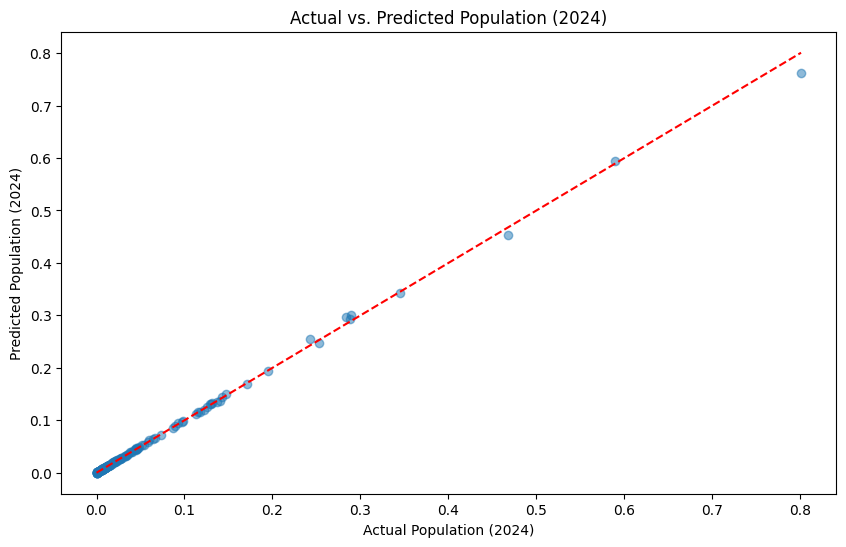

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Population (2024)')
plt.ylabel('Predicted Population (2024)')
plt.title('Actual vs. Predicted Population (2024)')
plt.show()

### **Residual Plot**

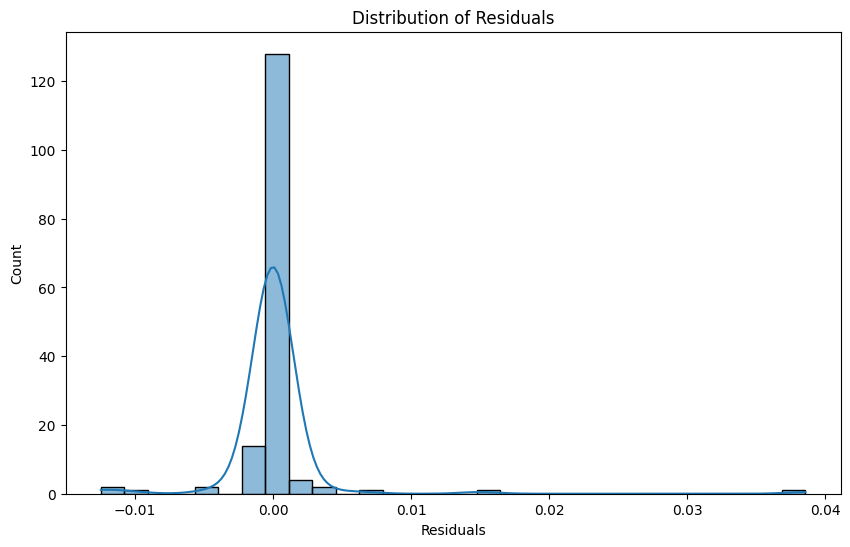

In [8]:
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()  

if isinstance(y_pred, np.ndarray):
    y_pred = pd.Series(y_pred, index=y_test.index)  

residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


### **Feature Importance**

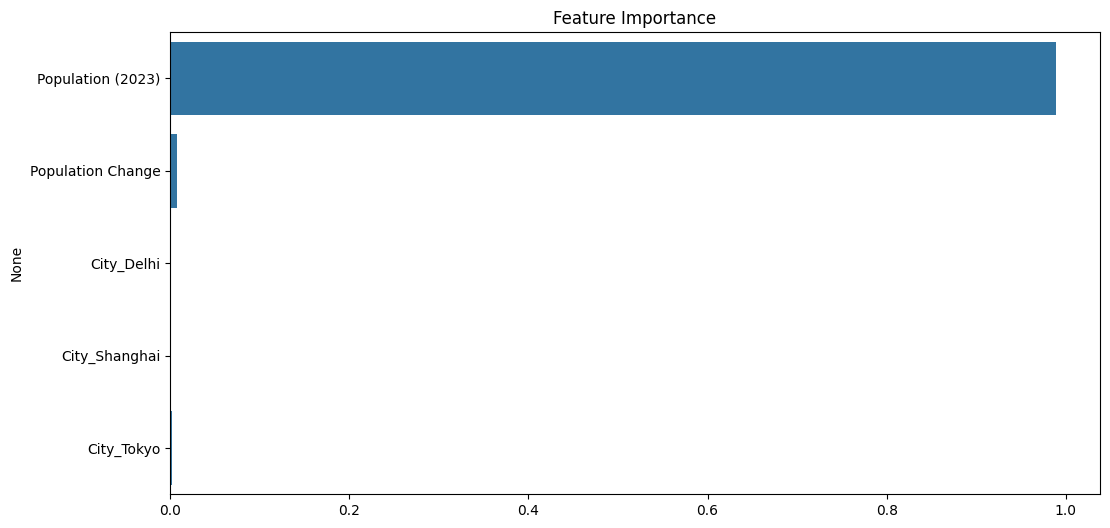

In [9]:
feature_importances = model.feature_importances_
features = X_test.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()

## **Summary and Insights**

### **Saving Notebook and Visualization**

In [10]:
plt.savefig('/workspaces/Global-Population-Growth-EDA-and-Prediction/reports/actual_vs_predicted.png')


<Figure size 640x480 with 0 Axes>